In [1]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Mean square error cost function with regularization

In [2]:
errs = []
its = []

class Weather:
    def __init__(self, iters=1000, alpha=0.000006, reg_param=1):
        self.thetas=[]
        self.iters = iters
        self.alpha = alpha
        self.reg_param = reg_param

    def clean(self, dfpath):
        df = pd.read_csv(dfpath)
        df.drop(columns=['Formatted Date', 'Daily Summary'], inplace=True)
        of = df['Apparent Temperature (C)'].to_numpy().copy()
        df.drop(columns=['Apparent Temperature (C)'], inplace=True)
        df.fillna(value="nothing", inplace=True)
        df = pd.get_dummies(df, columns=['Summary', 'Precip Type'])
#         print(df)
        df['Apparent Temperature (C)'] = of
        return df.to_numpy().copy()


    def normalize(self, array):
        c = array.shape[1]
        for ind in range(c):
            col = array[:,ind]
            array[:,ind] = (col - col.min())/(col.max() - col.min())
#         print("fin arr")
        # print(array)
        return array

    def train(self, trainpath):
        train_data = self.clean(trainpath)
        # np.random.shuffle(train_data)
        X_part = train_data[:,0:-1]
        Y_part = train_data[:,-1]
        X_part = self.normalize(X_part)
        X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        # print(X_part)
        x_train, self.x_test, y_train, self.y_test = train_test_split(X_part, Y_part, train_size=0.7)
        self.thetas = np.random.rand(X_part.shape[1], 1)
        # print("thetas")
        # print(self.thetas)
        # print(x_sums.shape)
        samples = x_train.shape[0]
        y_train = y_train.reshape((-1,1))
        xt = x_train.transpose()
        for it in range(self.iters):
            y_temp = np.dot(x_train, self.thetas)
            err = np.subtract(y_temp, y_train)
            
            cost = ((np.square(err)).sum() + self.reg_param*(np.square(self.thetas).sum()))/(2*samples)
            errs.append(cost)
            its.append(it+1)
#             print("iter "+str(it+1)+" cost = "+str(cost))
            temp = np.dot(xt, err)
            temp = temp.reshape((-1,1))
            self.thetas *= (1 - (self.alpha*self.reg_param)/samples)
            self.thetas -= self.alpha*temp

    
    def predict(self, testpath):
        # test_data = np.genfromtxt(trainpath, delimiter=',')
        # X_part = test_data[:,0:-1]
        # Y_part = test_data[:,-1]
        # X_part = self.normalize(X_part)
        # X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        preds = np.dot(self.x_test, self.thetas)
#         print("score")
        print(r2_score(self.y_test, preds))
        rs = r2_score(self.y_test, preds)
        return preds


model4 = Weather()
model4.train('./Datasets/Question-4/train.csv') # Path to the train.csv will be provided 
prediction4 = model4.predict('./Datasets/Question-4/test.csv')


0.9840600116332273


^ R2 score with mean square error cost function

### Mean absolute error cost function

In [4]:
errs2=[]

class Weather2:
    def __init__(self, iters=1000, alpha=0.02, reg_param=0):
        self.thetas=[]
        self.iters = iters
        self.alpha = alpha
        self.reg_param = reg_param

    def clean(self, dfpath):
        df = pd.read_csv(dfpath)
        df.drop(columns=['Formatted Date', 'Daily Summary'], inplace=True)
        of = df['Apparent Temperature (C)'].to_numpy().copy()
        df.drop(columns=['Apparent Temperature (C)'], inplace=True)
        df.fillna(value="nothing", inplace=True)
        df = pd.get_dummies(df, columns=['Summary', 'Precip Type'])
#         print(df)
        df['Apparent Temperature (C)'] = of
        return df.to_numpy().copy()


    def normalize(self, array):
        c = array.shape[1]
        for ind in range(c):
            col = array[:,ind]
            array[:,ind] = (col - col.min())/(col.max() - col.min())
#         print("fin arr")
        # print(array)
        return array

    def train(self, trainpath):
        train_data = self.clean(trainpath)
        # np.random.shuffle(train_data)
        X_part = train_data[:,0:-1]
        Y_part = train_data[:,-1]
        X_part = self.normalize(X_part)
        X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        # print(X_part)
        x_train, self.x_test, y_train, self.y_test = train_test_split(X_part, Y_part, train_size=0.7)
        self.thetas = np.random.rand(X_part.shape[1], 1)
        # print("thetas")
        # print(self.thetas)
        # print(x_sums.shape)
        samples = x_train.shape[0]
        y_train = y_train.reshape((-1,1))
        xt = x_train.transpose()
        t = np.sum(xt, axis=1,keepdims=True)/samples
        for it in range(self.iters):
            y_temp = np.dot(x_train, self.thetas)
            err = np.subtract(y_temp, y_train)
            terr = err.sum()
            if terr > 0:
                terr = 1
            else:
                terr = -1
            err = np.absolute(err).sum()/(2*samples)
            errs2.append(err)
            cost = ((np.absolute(err)).sum() + self.reg_param*(np.square(self.thetas).sum()))/(2*samples)
#             print("iter "+str(it+1)+" cost = "+str(err))
#             print(err)
            temp = np.dot(xt, err)
            temp = temp.reshape((-1,1))
#             print("xt shape")
#             print(xt.shape)
            
#             print(t)
#             print(()/(samples))
            self.thetas -= terr*(self.alpha*t)
#             self.thetas *= (1 - (self.alpha*self.reg_param)/samples)
#             self.thetas -= self.alpha*temp

    
    def predict(self, testpath):
        # test_data = np.genfromtxt(trainpath, delimiter=',')
        # X_part = test_data[:,0:-1]
        # Y_part = test_data[:,-1]
        # X_part = self.normalize(X_part)
        # X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        preds = np.dot(self.x_test, self.thetas)
#         print("score")
        print(r2_score(self.y_test, preds))
        rs = r2_score(self.y_test, preds)
        return preds


model4 = Weather2()
model4.train('./Datasets/Question-4/train.csv') # Path to the train.csv will be provided 
prediction4 = model4.predict('./Datasets/Question-4/test.csv')


0.10967006069782081


^ R2 score with mean absolute error cost function

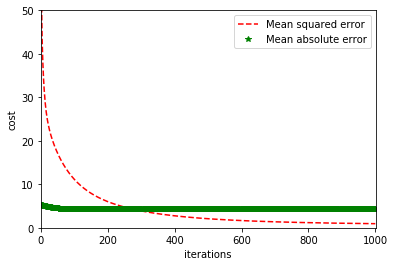

<Figure size 1440x1224 with 0 Axes>

In [7]:
plt.plot(its, errs, 'r--', label="Mean squared error")
plt.plot(its, errs2, 'g*', label="Mean absolute error")
plt.legend(loc='best')
plt.axis([0, 1001, 0, 50])
plt.xlabel('iterations')
plt.ylabel('cost')
plt.figure(figsize=(20,17))
plt.show()
